In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Turkish/Turkish(SKG_VIE).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,09:45:00,09:45:00,0,6,1,1,1,220,554.09
1,09:45:00,13:25:00,0,6,1,1,0,440,1124.09
2,09:45:00,13:25:00,1,7,1,1,0,110,276.09
3,09:45:00,18:05:00,2,1,1,1,0,110,186.09
4,09:45:00,08:45:00,2,1,1,1,1,420,766.08


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 9 columns):
departure_time      1582 non-null object
arrival_time        1582 non-null object
days_before         1582 non-null int64
day_of_week         1582 non-null int64
num_of_luggage      1582 non-null int64
num_of_stops        1582 non-null int64
overnight_flight    1582 non-null int64
Class               1582 non-null int64
price               1582 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 111.4+ KB


In [7]:
df.shape

(1582, 9)

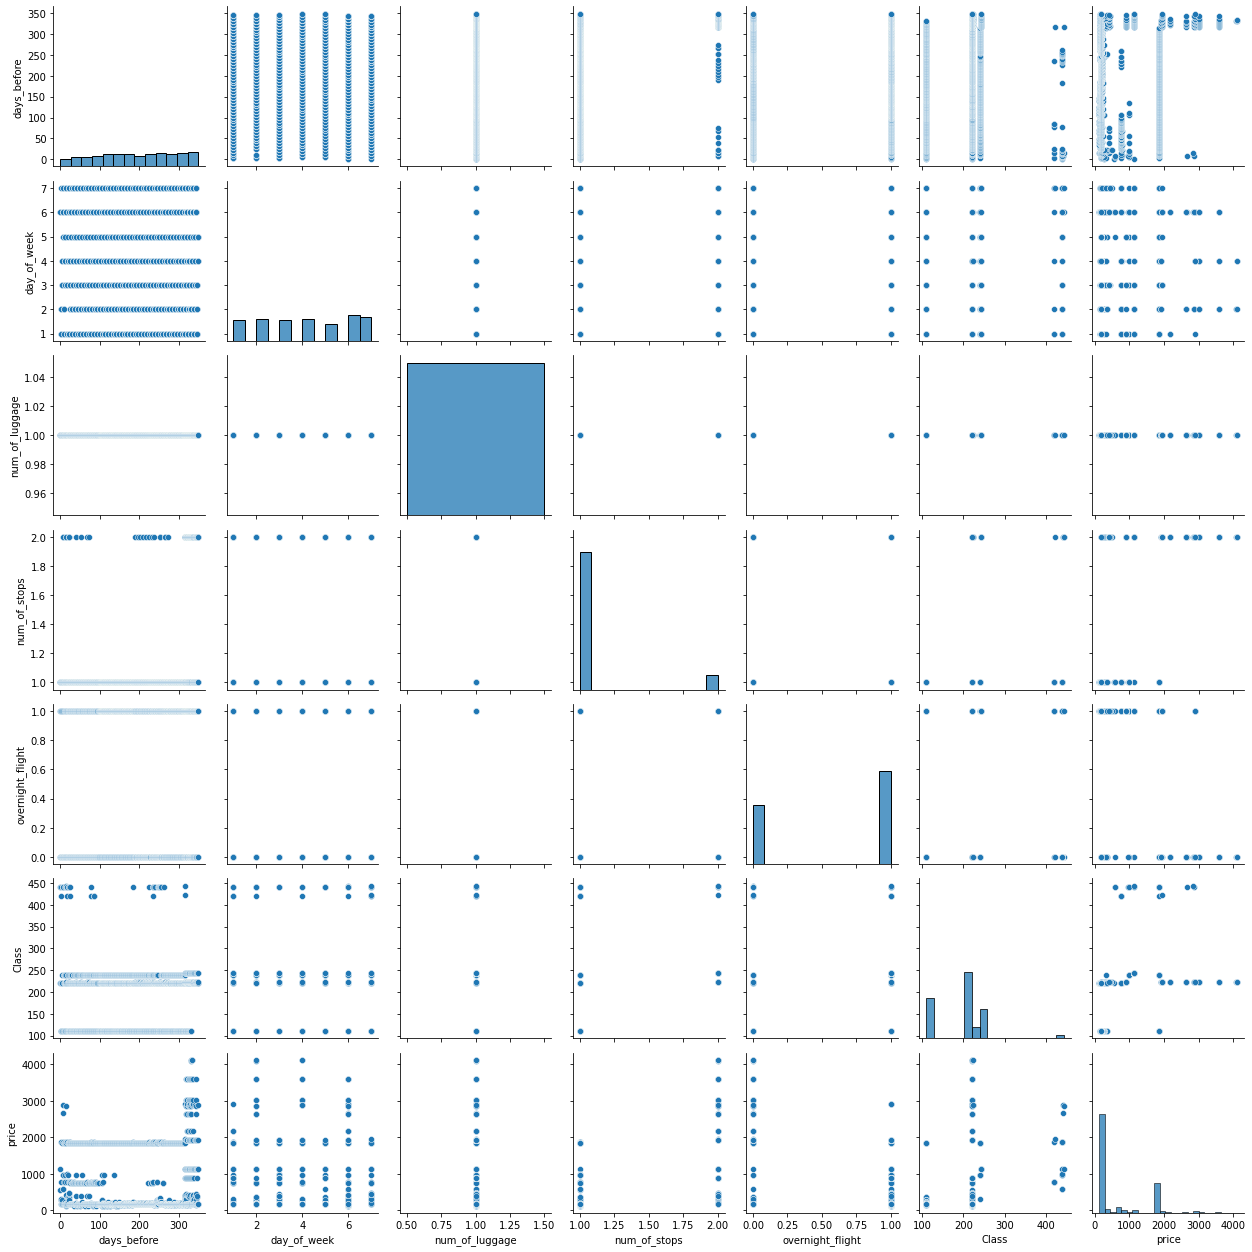

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 09:45:00,1900-01-01 09:45:00,0,6,1,1,1,220,554.09
1,1900-01-01 09:45:00,1900-01-01 13:25:00,0,6,1,1,0,440,1124.09
2,1900-01-01 09:45:00,1900-01-01 13:25:00,1,7,1,1,0,110,276.09
3,1900-01-01 09:45:00,1900-01-01 18:05:00,2,1,1,1,0,110,186.09
4,1900-01-01 09:45:00,1900-01-01 08:45:00,2,1,1,1,1,420,766.08


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 09:45:00,1900-01-01 09:45:00,0,6,1,1,1,220,554.09,-2208953700000000000,-2208953700000000000
1,1900-01-01 09:45:00,1900-01-01 13:25:00,0,6,1,1,0,440,1124.09,-2208953700000000000,-2208940500000000000
2,1900-01-01 09:45:00,1900-01-01 13:25:00,1,7,1,1,0,110,276.09,-2208953700000000000,-2208940500000000000
3,1900-01-01 09:45:00,1900-01-01 18:05:00,2,1,1,1,0,110,186.09,-2208953700000000000,-2208923700000000000
4,1900-01-01 09:45:00,1900-01-01 08:45:00,2,1,1,1,1,420,766.08,-2208953700000000000,-2208957300000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,6,0,1,1,1,220,554.09
1,6,0,1,1,0,440,1124.09
2,7,1,1,1,0,110,276.09
3,1,2,1,1,0,110,186.09
4,1,2,1,1,1,420,766.08


In [21]:
df.to_csv('skg_vie_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [55]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8656488496363278


In [56]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9336726766779221


In [57]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.935875893495384


In [58]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
}

dtr = DecisionTreeRegressor(random_state=0)

grid_tree = GridSearchCV(estimator=dtr, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1,)
                           
grid_tree.fit(X_train,y_train)

y_pred = grid_tree.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Accuracy score of the predictions: 0.8589609758557093


In [59]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.876117390052421


In [60]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.9359745995070111


In [61]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.35160673713122037


In [62]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.39949187418195864


In [63]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
40/40 [==============================] - 3s 9ms/step - loss: 521662.7500 - val_loss: 1129575.1250
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 385855.2812 - val_loss: 1588650.2500
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 379015.1875 - val_loss: 1467214.3750
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 378699.0938 - val_loss: 1512619.7500
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 383102.2188 - val_loss: 1439466.1250
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 381996.4062 - val_loss: 1339394.6250
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 375180.0312 - val_loss: 1517697.8750
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 377373.9375 - val_loss: 1400965.5000
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 372684.1875 - val_loss: 1554008.8750
Epoch 10/2

Epoch 75/200
40/40 [==============================] - 0s 4ms/step - loss: 151529.1250 - val_loss: 1302007.6250
Epoch 76/200
40/40 [==============================] - 0s 4ms/step - loss: 141976.7188 - val_loss: 1250840.1250
Epoch 77/200
40/40 [==============================] - 0s 4ms/step - loss: 147941.2031 - val_loss: 1372125.6250
Epoch 78/200
40/40 [==============================] - 0s 4ms/step - loss: 162469.3125 - val_loss: 1254614.2500
Epoch 79/200
40/40 [==============================] - 0s 5ms/step - loss: 143101.1719 - val_loss: 1192711.2500
Epoch 80/200
40/40 [==============================] - 0s 4ms/step - loss: 146803.9062 - val_loss: 1257445.5000
Epoch 81/200
40/40 [==============================] - 0s 4ms/step - loss: 144262.2500 - val_loss: 1215258.2500
Epoch 82/200
40/40 [==============================] - 0s 4ms/step - loss: 151542.1719 - val_loss: 1201791.6250
Epoch 83/200
40/40 [==============================] - 0s 4ms/step - loss: 143812.6562 - val_loss: 1296195.8750
E

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.45951149301937533


In [64]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 549449.9375 - val_loss: 1169684.1250
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 391957.5625 - val_loss: 1674363.8750
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 389303.0000 - val_loss: 1360050.7500
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 380686.3125 - val_loss: 1405230.8750
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 379111.7500 - val_loss: 1472264.6250
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 376753.4062 - val_loss: 1401415.2500
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 376130.0938 - val_loss: 1426035.3750
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 374411.6875 - val_loss: 1486166.3750
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 372714.6250 - val_loss: 1538293.0000
Epoch 10/2

Epoch 75/200
40/40 [==============================] - 0s 4ms/step - loss: 150290.1875 - val_loss: 1490221.0000
Epoch 76/200
40/40 [==============================] - 0s 4ms/step - loss: 157118.4219 - val_loss: 1454848.2500
Epoch 77/200
40/40 [==============================] - 0s 4ms/step - loss: 160616.8438 - val_loss: 1297798.2500
Epoch 78/200
40/40 [==============================] - 0s 5ms/step - loss: 148546.3125 - val_loss: 1266521.6250
Epoch 79/200
40/40 [==============================] - 0s 4ms/step - loss: 151997.0781 - val_loss: 1440915.7500
Epoch 80/200
40/40 [==============================] - 0s 4ms/step - loss: 148905.4219 - val_loss: 1503477.5000
Epoch 81/200
40/40 [==============================] - 0s 4ms/step - loss: 149994.7812 - val_loss: 1463461.5000
Epoch 82/200
40/40 [==============================] - 0s 4ms/step - loss: 140414.6406 - val_loss: 1396501.3750
Epoch 83/200
40/40 [==============================] - 0s 4ms/step - loss: 142634.6094 - val_loss: 1506802.1250
E

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.4148681401450889


In [65]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
40/40 [==============================] - 1s 6ms/step - loss: 634890.6875 - val_loss: 1232572.0000
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 412284.0938 - val_loss: 1289596.6250
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 380742.0000 - val_loss: 1329143.3750
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 379701.3750 - val_loss: 1441756.2500
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 379465.1875 - val_loss: 1476458.5000
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 376388.0625 - val_loss: 1439468.8750
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 376322.9688 - val_loss: 1486795.2500
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 373956.1562 - val_loss: 1320174.1250
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 377784.7812 - val_loss: 1646296.3750
Epoch 10/2

40/40 [==============================] - 0s 4ms/step - loss: 126032.2812 - val_loss: 1266401.3750
Epoch 148/200
40/40 [==============================] - 0s 4ms/step - loss: 116749.7969 - val_loss: 1631618.3750
Epoch 149/200
40/40 [==============================] - 0s 4ms/step - loss: 128383.1797 - val_loss: 1304873.1250
Epoch 150/200
40/40 [==============================] - 0s 4ms/step - loss: 123380.4375 - val_loss: 1368184.7500
Epoch 151/200
40/40 [==============================] - 0s 5ms/step - loss: 120212.2656 - val_loss: 1303699.6250
Epoch 152/200
40/40 [==============================] - 0s 5ms/step - loss: 128781.5703 - val_loss: 1347939.7500
Epoch 153/200
40/40 [==============================] - 0s 4ms/step - loss: 130935.9297 - val_loss: 1045051.0625
Epoch 154/200
40/40 [==============================] - 0s 4ms/step - loss: 130902.0703 - val_loss: 1211247.0000
Epoch 155/200
40/40 [==============================] - 0s 4ms/step - loss: 121368.2344 - val_loss: 1299062.3750
Epoch 

In [66]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
40/40 [==============================] - 1s 9ms/step - loss: 509129.4062 - val_loss: 1560592.3750
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 385066.5625 - val_loss: 1318893.3750
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 384077.4688 - val_loss: 1554647.5000
Epoch 4/200
40/40 [==============================] - 0s 4ms/step - loss: 391648.2188 - val_loss: 1429481.7500
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 380383.6562 - val_loss: 1499055.1250
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 372021.1562 - val_loss: 1508436.7500
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 369593.5312 - val_loss: 1617982.8750
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 365687.9375 - val_loss: 1443215.5000
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 365355.5312 - val_loss: 1263381.7500
Epoch 10/2

Epoch 75/200
40/40 [==============================] - 0s 4ms/step - loss: 138484.8594 - val_loss: 1614738.2500
Epoch 76/200
40/40 [==============================] - 0s 4ms/step - loss: 136837.8750 - val_loss: 1504997.0000
Epoch 77/200
40/40 [==============================] - 0s 4ms/step - loss: 140393.1875 - val_loss: 1680224.3750
Epoch 78/200
40/40 [==============================] - 0s 4ms/step - loss: 147610.2812 - val_loss: 1543365.7500
Epoch 79/200
40/40 [==============================] - 0s 4ms/step - loss: 149592.5000 - val_loss: 1517638.5000
Epoch 80/200
40/40 [==============================] - 0s 4ms/step - loss: 131282.9531 - val_loss: 1360960.0000
Epoch 81/200
40/40 [==============================] - 0s 4ms/step - loss: 144086.6094 - val_loss: 1567769.8750
Epoch 82/200
40/40 [==============================] - 0s 4ms/step - loss: 133446.2031 - val_loss: 1469597.2500
Epoch 83/200
40/40 [==============================] - 0s 4ms/step - loss: 133777.9219 - val_loss: 1594373.6250
E

In [68]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet34',res18_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 744147.3125 - val_loss: 1152347.7500
Epoch 2/200
40/40 [==============================] - 0s 5ms/step - loss: 488628.7188 - val_loss: 1180463.1250
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 393710.2812 - val_loss: 1316978.3750
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 379916.4375 - val_loss: 1554364.1250
Epoch 5/200
40/40 [==============================] - 0s 5ms/step - loss: 378361.7812 - val_loss: 1563712.8750
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 380921.8438 - val_loss: 1473443.6250
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 375944.4688 - val_loss: 1458915.3750
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 374329.5000 - val_loss: 1633721.7500
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 372727.4688 - val_loss: 1590972.8750
Epoch 10/2

40/40 [==============================] - 0s 4ms/step - loss: 136916.2188 - val_loss: 1556925.7500
Epoch 148/200
40/40 [==============================] - 0s 4ms/step - loss: 142417.9688 - val_loss: 1619882.7500
Epoch 149/200
40/40 [==============================] - 0s 4ms/step - loss: 134390.6875 - val_loss: 1547482.2500
Epoch 150/200
40/40 [==============================] - 0s 4ms/step - loss: 135115.1250 - val_loss: 1390107.6250
Epoch 151/200
40/40 [==============================] - 0s 5ms/step - loss: 136999.5000 - val_loss: 1379295.7500
Epoch 152/200
40/40 [==============================] - 0s 5ms/step - loss: 137036.2500 - val_loss: 1512818.6250
Epoch 153/200
40/40 [==============================] - 0s 4ms/step - loss: 135746.9531 - val_loss: 1487485.3750
Epoch 154/200
40/40 [==============================] - 0s 4ms/step - loss: 133904.6406 - val_loss: 1483578.5000
Epoch 155/200
40/40 [==============================] - 0s 4ms/step - loss: 135636.9375 - val_loss: 1540519.0000
Epoch 

In [69]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
40/40 [==============================] - 1s 11ms/step - loss: 457824.2188 - val_loss: 1315483.3750
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 390330.4062 - val_loss: 1464737.7500
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 380471.8438 - val_loss: 1678567.8750
Epoch 4/200
40/40 [==============================] - 0s 5ms/step - loss: 394220.3438 - val_loss: 1311288.8750
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 377918.1250 - val_loss: 1513925.5000
Epoch 6/200
40/40 [==============================] - 0s 4ms/step - loss: 364611.9688 - val_loss: 1612379.8750
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 370951.0938 - val_loss: 1228864.2500
Epoch 8/200
40/40 [==============================] - 0s 5ms/step - loss: 335080.3438 - val_loss: 1323583.5000
Epoch 9/200
40/40 [==============================] - 0s 4ms/step - loss: 279427.0312 - val_loss: 1289159.1250
Epoch 10/

Epoch 75/200
40/40 [==============================] - 0s 4ms/step - loss: 138229.2188 - val_loss: 1601731.5000
Epoch 76/200
40/40 [==============================] - 0s 4ms/step - loss: 125911.6641 - val_loss: 1474521.2500
Epoch 77/200
40/40 [==============================] - 0s 4ms/step - loss: 135734.0156 - val_loss: 1464702.7500
Epoch 78/200
40/40 [==============================] - 0s 4ms/step - loss: 125464.8516 - val_loss: 1477181.6250
Epoch 79/200
40/40 [==============================] - 0s 4ms/step - loss: 147531.7500 - val_loss: 1503811.2500
Epoch 80/200
40/40 [==============================] - 0s 5ms/step - loss: 130906.7891 - val_loss: 1494457.3750
Epoch 81/200
40/40 [==============================] - 0s 5ms/step - loss: 130032.3047 - val_loss: 1558112.0000
Epoch 82/200
40/40 [==============================] - 0s 5ms/step - loss: 138945.5312 - val_loss: 1494238.5000
Epoch 83/200
40/40 [==============================] - 0s 4ms/step - loss: 129483.8359 - val_loss: 1563928.3750
E

Epoch 149/200
40/40 [==============================] - 0s 5ms/step - loss: 45404.1250 - val_loss: 1572922.6250
Epoch 150/200
40/40 [==============================] - 0s 5ms/step - loss: 44166.2930 - val_loss: 1504701.7500
Epoch 151/200
40/40 [==============================] - 0s 5ms/step - loss: 42701.3750 - val_loss: 1589740.6250
Epoch 152/200
40/40 [==============================] - 0s 4ms/step - loss: 42601.9336 - val_loss: 1506328.8750
Epoch 153/200
40/40 [==============================] - 0s 5ms/step - loss: 43168.4531 - val_loss: 1579091.7500
Epoch 154/200
40/40 [==============================] - 0s 4ms/step - loss: 43912.3828 - val_loss: 1558493.2500
Epoch 155/200
40/40 [==============================] - 0s 4ms/step - loss: 43352.4883 - val_loss: 1570121.7500
Epoch 156/200
40/40 [==============================] - 0s 5ms/step - loss: 42548.7695 - val_loss: 1500505.5000
Epoch 157/200
40/40 [==============================] - 0s 4ms/step - loss: 41749.6680 - val_loss: 1548871.7500
E

In [70]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [71]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [72]:
result

,ML Model,R2-Score
0,AdaBoost,0.866
1,Bagging,0.934
2,Gradient Boosting,0.936
3,Decision Tree,0.859
4,Random Forest,0.876
5,Extra Tree,0.936
6,SVR,0.350
7,MLP,0.399
8,VGG11,0.460
9,VGG13,0.415


# Graph

In [73]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

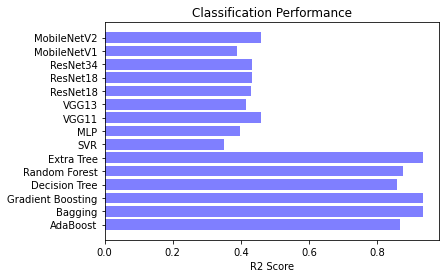

In [74]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()